## Agile Hardware Design
***
# Sequential Circuits

<img src="../resource/logo.svg" alt="agile hardware design logo" style="float:right"/>

## Prof. Scott Beamer
### sbeamer@ucsc.edu

## [CSE 228A](https://classes.soe.ucsc.edu/cse228a/Winter24/)

## Plan for Today

* Registers!
* Example sequential blocks
* State machines
* Viewing simulation results

## Test Chisel Library ##

In [22]:
// Before we start. We test for UCB stcture and make sure they worked.
// Below, we test for UCB stcture and make sure they worked.
val path = System.getProperty("user.dir") + "/source/load-ivy.sc"
println("path: "+path)
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

path: /home/peter/AIU/AIU_CS800_Chisel/500_UCSC_HWD/004_SeqCircuit/001_Code/source/load-ivy.sc


path: String = "/home/peter/AIU/AIU_CS800_Chisel/500_UCSC_HWD/004_SeqCircuit/001_Code/source/load-ivy.sc"

## Loading The Chisel Library Into a Notebook

In [23]:
//interp.load.module(os.Path(s"${System.getProperty("user.dir")}/../resource/chisel_deps.sc"))
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

In [24]:
import chisel3._
import chisel3.util._
import chiseltest._
import chiseltest.RawTester.test
import treadle._
// ChiselEnum
import chisel3.experimental.ChiselEnum

import chisel3._

import chisel3.util._

import chiseltest._

import chiseltest.RawTester.test

import treadle._
// ChiselEnum

import chisel3.experimental.ChiselEnum

## Registers

* Explicitly declare a register with `Reg(type)`
  * Contrast from Verilog where registers are synthesized
* A register is simply another block, no special semantics for time
  * Simply need to connect its input and its output
* `clock` and `reset` are implicit
* Not covered today: functionality for using other clocks ([multi-clock](https://www.chisel-lang.org/chisel3/docs/explanations/multi-clock.html) and [asynchronous reset](https://www.chisel-lang.org/chisel3/docs/explanations/reset.html)


<img src="images/reg.svg" alt="register schamic" style="width:60%;" align="center"/>

## Other Flavors of `Reg`

* Helper functions streamline

### [Set Initial Value](https://javadoc.io/doc/edu.berkeley.cs/chisel3_2.13/latest/chisel3/RegInit$.html) - `RegInit(init)`
* Value applied synchronously when `reset` true

### [Attach Input](https://javadoc.io/static/edu.berkeley.cs/chisel3_2.13/3.6.0/chisel3/RegNext$.html) - `RegNext(next)`
* Useful for delaying a signal by a cycle
* Connects input in same line

### [Enable](https://javadoc.io/doc/edu.berkeley.cs/chisel3_2.13/latest/chisel3/util/RegEnable$.html) - `RegEnable(next, en)`
* Write enable for when to update

### Default Register: Reg (Bool()) ###

In [25]:
// default Register:
// val r = Reg(Bool())
class RegLand extends Module {
    val io = IO(new Bundle {
        val in  = Input(Bool())
        val en  = Input(Bool())
        val out = Output(Bool())
    })
    val r = Reg(Bool())
//    val r = RegInit(0.B)
    r := io.in
    io.out := r
//     io.out := RegNext(io.in, 0.B)
//     io.out := RegEnable(io.in, 0.B, io.en)
}
//printVerilog(new RegLand)
// There is an option in CHisel to disable the print out of "randomize Logic" 
// https://github.com/chipsalliance/chisel/issues/1444
println (getVerilog(new RegLand))
//println (getVerilog(new RegLand), firtoolOpts=Array("-disable-all-randomization"))

//import circt.stage.ChiselStage  // error in unknow "circt"
//ChiselStage.emitSystemVerilog(new RegLand, firtoolOpts=Array("-disable-all-randomization"))

Elaborating design...
Done elaborating.
module RegLand(
  input   clock,
  input   reset,
  input   io_in,
  input   io_en,
  output  io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg  r; // @[cmd24.sc 7:16]
  assign io_out = r; // @[cmd24.sc 10:12]
  always @(posedge clock) begin
    r <= io_in; // @[cmd24.sc 9:7]
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initvar;
`endif
`ifndef SYNTHESIS
`ifdef FIRRTL_BEFORE_INITIAL
`FIRRTL_BEFORE_INITIAL
`endif
initial begin
  `ifdef RANDOMIZE
    `ifdef INIT_RANDOM
      `INIT_RANDOM
    `endif
    `ifndef VERILATOR
      `ifdef RANDOMIZE_DELAY
        #`RANDOMIZE_DELAY begin end
      `else
        #0.002 begin 

defined class RegLand

### Inital Value: RegInit(0.8U) ###

In [26]:
// Inital Value
// val r = RegInit(0.B)
class RegLand extends Module {
    val io = IO(new Bundle {
        val in  = Input(Bool())
        val en  = Input(Bool())
        val out = Output(Bool())
    })
    // val r = Reg(Bool())
    val r = RegInit(0.B)
    r := io.in
    io.out := r
//     io.out := RegNext(io.in, 0.B)
//     io.out := RegEnable(io.in, 0.B, io.en)
}
//printVerilog(new RegLand)
// There is an option in CHisel to disable the print out of "randomize Logic" 
// https://github.com/chipsalliance/chisel/issues/1444
println (getVerilog(new RegLand))

Elaborating design...
Done elaborating.
module RegLand(
  input   clock,
  input   reset,
  input   io_in,
  input   io_en,
  output  io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg  r; // @[cmd25.sc 8:20]
  assign io_out = r; // @[cmd25.sc 10:12]
  always @(posedge clock) begin
    if (reset) begin // @[cmd25.sc 8:20]
      r <= 1'h0; // @[cmd25.sc 8:20]
    end else begin
      r <= io_in; // @[cmd25.sc 9:7]
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initvar;
`endif
`ifndef SYNTHESIS
`ifdef FIRRTL_BEFORE_INITIAL
`FIRRTL_BEFORE_INITIAL
`endif
initial begin
  `ifdef RANDOMIZE
    `ifdef INIT_RANDOM
      `INIT_RANDOM
    `endif
    `ifndef V

defined class RegLand

### RegNext() ###

In [27]:
// use io.out = RegNext()
class RegLand extends Module {
    val io = IO(new Bundle {
        val in  = Input(Bool())
        val en  = Input(Bool())
        val out = Output(Bool())
    })
//    val r = Reg(Bool())
//    val r = RegInit(0.B)
//    r := io.in
//    io.out := r
     io.out := RegNext(io.in, 0.B)
//     io.out := RegEnable(io.in, 0.B, io.en)
}
//printVerilog(new RegLand)
// There is an option in CHisel to disable the print out of "randomize Logic" 
// https://github.com/chipsalliance/chisel/issues/1444
println (getVerilog(new RegLand))

Elaborating design...
Done elaborating.
module RegLand(
  input   clock,
  input   reset,
  input   io_in,
  input   io_en,
  output  io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg  REG; // @[cmd26.sc 11:23]
  assign io_out = REG; // @[cmd26.sc 11:13]
  always @(posedge clock) begin
    if (reset) begin // @[cmd26.sc 11:23]
      REG <= 1'h0; // @[cmd26.sc 11:23]
    end else begin
      REG <= io_in; // @[cmd26.sc 11:23]
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initvar;
`endif
`ifndef SYNTHESIS
`ifdef FIRRTL_BEFORE_INITIAL
`FIRRTL_BEFORE_INITIAL
`endif
initial begin
  `ifdef RANDOMIZE
    `ifdef INIT_RANDOM
      `INIT_RANDOM
    `endif


defined class RegLand

### RegEnable() ###

In [28]:
// use RegEnable()
// io.out := RegEnable(io.in, 0.B, io.en)
class RegLand extends Module {
    val io = IO(new Bundle {
        val in  = Input(Bool())
        val en  = Input(Bool())
        val out = Output(Bool())
    })
//    val r = Reg(Bool())
//    val r = RegInit(0.B)
//    r := io.in
//    io.out := r
//     io.out := RegNext(io.in, 0.B)
     io.out := RegEnable(io.in, 0.B, io.en)
}
//printVerilog(new RegLand)
// There is an option in CHisel to disable the print out of "randomize Logic" 
// https://github.com/chipsalliance/chisel/issues/1444
println (getVerilog(new RegLand))

Elaborating design...
Done elaborating.
module RegLand(
  input   clock,
  input   reset,
  input   io_in,
  input   io_en,
  output  io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg  r; // @[Reg.scala 27:20]
  assign io_out = r; // @[cmd27.sc 12:13]
  always @(posedge clock) begin
    if (reset) begin // @[Reg.scala 27:20]
      r <= 1'h0; // @[Reg.scala 27:20]
    end else if (io_en) begin // @[Reg.scala 28:19]
      r <= io_in; // @[Reg.scala 28:23]
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initvar;
`endif
`ifndef SYNTHESIS
`ifdef FIRRTL_BEFORE_INITIAL
`FIRRTL_BEFORE_INITIAL
`endif
initial begin
  `ifdef RANDOMIZE
    `ifdef INIT_RANDOM
 

defined class RegLand

## Example: Counter (done manually)

### Reg() ###

In [29]:
// Use Reg()
class MyCounter(maxVal: Int) extends Module {
    val io = IO(new Bundle {
        val en  = Input(Bool())
        val out = Output(UInt())
    })
    val count = Reg(UInt(log2Ceil(maxVal+1).W))
    val nextVal = Mux(count < maxVal.U, count + 1.U, 0.U)
    val applyEn = Mux(io.en, nextVal, count)
    count := Mux(reset.asBool, 0.U, applyEn)
    io.out := count
}
//printVerilog(new MyCounter(15))
println (getVerilog(new MyCounter(15)))

Elaborating design...
Done elaborating.
module MyCounter(
  input        clock,
  input        reset,
  input        io_en,
  output [3:0] io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg [3:0] count; // @[cmd28.sc 6:20]
  wire [3:0] _T_2 = count + 4'h1; // @[cmd28.sc 7:47]
  assign io_out = count; // @[cmd28.sc 10:12]
  always @(posedge clock) begin
    if (reset) begin // @[cmd28.sc 9:17]
      count <= 4'h0;
    end else if (io_en) begin // @[cmd28.sc 8:22]
      if (count < 4'hf) begin // @[cmd28.sc 7:22]
        count <= _T_2;
      end else begin
        count <= 4'h0;
      end
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initvar;
`endif

defined class MyCounter

### RegInit() ###

In [30]:
// Use: RegInit()
class RegLand extends Module {
    val io = IO(new Bundle {
        val in  = Input(Bool())
        val en  = Input(Bool())
        val out = Output(Bool())
    })
    //val r = Reg(Bool())
    val r = RegInit(0.B)
    r := io.in
    io.out := r
//     io.out := RegNext(io.in, 0.B)
//     io.out := RegEnable(io.in, 0.B, io.en)
}
//printVerilog(new RegLand)
// There is an option in CHisel to disable the print out of "randomize Logic" 
// https://github.com/chipsalliance/chisel/issues/1444
println (getVerilog(new RegLand))

Elaborating design...
Done elaborating.
module RegLand(
  input   clock,
  input   reset,
  input   io_in,
  input   io_en,
  output  io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg  r; // @[cmd29.sc 8:20]
  assign io_out = r; // @[cmd29.sc 10:12]
  always @(posedge clock) begin
    if (reset) begin // @[cmd29.sc 8:20]
      r <= 1'h0; // @[cmd29.sc 8:20]
    end else begin
      r <= io_in; // @[cmd29.sc 9:7]
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initvar;
`endif
`ifndef SYNTHESIS
`ifdef FIRRTL_BEFORE_INITIAL
`FIRRTL_BEFORE_INITIAL
`endif
initial begin
  `ifdef RANDOMIZE
    `ifdef INIT_RANDOM
      `INIT_RANDOM
    `endif
    `ifndef V

defined class RegLand

## Example: Counter (using RegInit)

In [31]:
class MyCounter(maxVal: Int) extends Module {
    val io = IO(new Bundle {
        val en  = Input(Bool())
        val out = Output(UInt())
    })
    val count = RegInit(0.U(log2Ceil(maxVal+1).W))
    val nextVal = Mux(count < maxVal.U, count + 1.U, 0.U)
    count := Mux(io.en, nextVal, count)
    io.out := count
}
//printVerilog(new MyCounter(15))
println (getVerilog(new MyCounter(15)))

Elaborating design...
Done elaborating.
module MyCounter(
  input        clock,
  input        reset,
  input        io_en,
  output [3:0] io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg [3:0] count; // @[cmd30.sc 6:24]
  wire [3:0] _T_2 = count + 4'h1; // @[cmd30.sc 7:47]
  assign io_out = count; // @[cmd30.sc 9:12]
  always @(posedge clock) begin
    if (reset) begin // @[cmd30.sc 6:24]
      count <= 4'h0; // @[cmd30.sc 6:24]
    end else if (io_en) begin // @[cmd30.sc 8:17]
      if (count < 4'hf) begin // @[cmd30.sc 7:22]
        count <= _T_2;
      end else begin
        count <= 4'h0;
      end
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  inte

defined class MyCounter

## Example: Counter (using when)

In [32]:
class MyCounter(maxVal: Int) extends Module {
    val io = IO(new Bundle {
        val en  = Input(Bool())
        val out = Output(UInt())
    })
    val count = RegInit(0.U(log2Ceil(maxVal+1).W))
    when (io.en) {
        when (count < maxVal.U) {
            count := count + 1.U
        } .otherwise {
            count := 0.U
        }
    }
    io.out := count
}
//printVerilog(new MyCounter(15))
println (getVerilog(new MyCounter(15)))

Elaborating design...
Done elaborating.
module MyCounter(
  input        clock,
  input        reset,
  input        io_en,
  output [3:0] io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg [3:0] count; // @[cmd31.sc 6:24]
  wire [3:0] _T_2 = count + 4'h1; // @[cmd31.sc 9:28]
  assign io_out = count; // @[cmd31.sc 14:12]
  always @(posedge clock) begin
    if (reset) begin // @[cmd31.sc 6:24]
      count <= 4'h0; // @[cmd31.sc 6:24]
    end else if (io_en) begin // @[cmd31.sc 7:18]
      if (count < 4'hf) begin // @[cmd31.sc 8:33]
        count <= _T_2; // @[cmd31.sc 9:19]
      end else begin
        count <= 4'h0; // @[cmd31.sc 11:19]
      end
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $rand

defined class MyCounter

## Example: Counter (using RegEnable, too dense?)

In [33]:
class MyCounter(maxVal: Int) extends Module {
    val io = IO(new Bundle {
        val en  = Input(Bool())
        val out = Output(UInt(log2Ceil(maxVal+1).W))
    })
    io.out := RegEnable(Mux(io.out < maxVal.U, io.out + 1.U, 0.U), 0.U, io.en)
}
//printVerilog(new MyCounter(15))
println (getVerilog(new MyCounter(15)))

Elaborating design...
Done elaborating.
module MyCounter(
  input        clock,
  input        reset,
  input        io_en,
  output [3:0] io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  wire [3:0] _T_2 = io_out + 4'h1; // @[cmd32.sc 6:55]
  reg [3:0] r; // @[Reg.scala 27:20]
  assign io_out = r; // @[cmd32.sc 6:12]
  always @(posedge clock) begin
    if (reset) begin // @[Reg.scala 27:20]
      r <= 4'h0; // @[Reg.scala 27:20]
    end else if (io_en) begin // @[Reg.scala 28:19]
      if (io_out < 4'hf) begin // @[cmd32.sc 6:28]
        r <= _T_2;
      end else begin
        r <= 4'h0;
      end
    end
  end
// Register and memory initialization
`ifdef RANDOMIZE_GARBAGE_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_INVALID_ASSIGN
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_REG_INIT
`define RANDOMIZE
`endif
`ifdef RANDOMIZE_MEM_INIT
`define RANDOMIZE
`endif
`ifndef RANDOM
`define RANDOM $random
`endif
`ifdef RANDOMIZE_MEM_INIT
  integer initva

defined class MyCounter

## Testing MyCounter

In [34]:
test(new MyCounter(3)) { c =>
    c.io.en.poke(1.B)
    c.io.out.expect(0.U)
    c.clock.step()

    c.io.en.poke(1.B)
    c.io.out.expect(1.U)
    c.clock.step()

    c.io.en.poke(1.B)
    c.io.out.expect(2.U)
    c.clock.step()

    c.io.en.poke(0.B)
    c.io.out.expect(3.U)
    c.clock.step()

    c.io.en.poke(1.B)
    c.io.out.expect(3.U)
    c.clock.step()

    c.io.en.poke(1.B)
    c.io.out.expect(0.U)
    c.clock.step()
}

Elaborating design...
Done elaborating.
test MyCounter Success: 0 tests passed in 8 cycles in 0.003687 seconds 2169.59 Hz


## Enums in Chisel (`ChiselEnum`)

* [`ChiselEnum`](https://javadoc.io/static/edu.berkeley.cs/chisel3_2.13/3.6.0/chisel3/ChiselEnum.html) provides [enumerations](https://www.chisel-lang.org/docs/explanations/chisel-enum) by assigning them `UInt`s (`Enumeration` is Scala)
* Helpful for putting human-sensical names to distinct values
* Example use cases
  * Naming states in a state machine
  * Labeling mux way selection options
  * Labeling options for interfaces
* [`Enum`](https://javadoc.io/static/edu.berkeley.cs/chisel3_2.13/3.6.0/chisel3/util/Enum.html) is the prior mechanism for Chisel you might see in older code

In [35]:
// import ChiseNum
import chisel3.experimental.ChiselEnum
object DemoEnum extends ChiselEnum {
  val nameA, nameB, nameC = Value
  val nameD = Value(5.U)
}

println(DemoEnum.nameA, DemoEnum.nameB, DemoEnum.nameC, DemoEnum.nameD)

(DemoEnum(0=nameA),DemoEnum(1=nameB),DemoEnum(2=nameC),DemoEnum(5=nameD))


import chisel3.experimental.ChiselEnum

defined object DemoEnum

## Example State Machine (Raccoon 🦝)

<img src="images/raccoon.svg" alt="raccoon fsm" style="width:45%;margin:auto"/>

In [36]:
object RaccAction extends ChiselEnum {
    val hide, wander, rummage, eat = Value
}
class Raccoon extends Module { // using when
    val io = IO(new Bundle {
        val noise = Input(Bool())
        val trash = Input(Bool())
        val food  = Input(Bool())
        val action = Output(RaccAction())
    })
    val state = RegInit(RaccAction.hide)
    when (state === RaccAction.hide) {
        when (!io.noise) { state := RaccAction.wander }
    } .elsewhen (state === RaccAction.wander) {
        when (io.noise) { state := RaccAction.hide }
        .elsewhen (io.trash) { state := RaccAction.rummage }
    } .elsewhen (state === RaccAction.rummage) {
        when (io.noise) { state := RaccAction.hide }
        .elsewhen (io.food) { state := RaccAction.eat }
    } .elsewhen (state === RaccAction.eat) {
        when (io.noise) { state := RaccAction.hide }
        .elsewhen (!io.food) { state := RaccAction.wander }
    }
    io.action := state
}
//printVerilog(new Raccoon)
println (getVerilog(new Raccoon))

Elaborating design...
Done elaborating.
module Raccoon(
  input        clock,
  input        reset,
  input        io_noise,
  input        io_trash,
  input        io_food,
  output [1:0] io_action
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg [1:0] state; // @[cmd35.sc 11:24]
  wire [1:0] _GEN_1 = io_trash ? 2'h2 : state; // @[cmd35.sc 16:30 cmd35.sc 16:38 cmd35.sc 11:24]
  wire [1:0] _GEN_3 = io_food ? 2'h3 : state; // @[cmd35.sc 19:29 cmd35.sc 19:37 cmd35.sc 11:24]
  wire [1:0] _GEN_4 = io_noise ? 2'h0 : _GEN_3; // @[cmd35.sc 18:25 cmd35.sc 18:33]
  wire [1:0] _GEN_5 = ~io_food ? 2'h1 : state; // @[cmd35.sc 22:30 cmd35.sc 22:38 cmd35.sc 11:24]
  wire [1:0] _GEN_6 = io_noise ? 2'h0 : _GEN_5; // @[cmd35.sc 21:25 cmd35.sc 21:33]
  wire [1:0] _GEN_7 = state == 2'h3 ? _GEN_6 : state; // @[cmd35.sc 20:44 cmd35.sc 11:24]
  assign io_action = state; // @[cmd35.sc 24:15]
  always @(posedge clock) begin
    if (reset) begin // @[cmd35.sc 11:24]
      s

defined object RaccAction
defined class Raccoon

In [37]:
object RaccAction extends ChiselEnum {
    val hide, wander, rummage, eat = Value
}
class Raccoon extends Module { // using switch
    val io = IO(new Bundle {
        val noise = Input(Bool())
        val trash = Input(Bool())
        val food  = Input(Bool())
        val action = Output(RaccAction())
    })
    val state = RegInit(RaccAction.hide)
    switch(state) {
        is (RaccAction.hide) {
            when (!io.noise) { state := RaccAction.wander }
        }
        is (RaccAction.wander) {
            when (io.noise) { state := RaccAction.hide }
            .elsewhen (io.trash) { state := RaccAction.rummage }
        }
        is (RaccAction.rummage) {
            when (io.noise) { state := RaccAction.hide }
            .elsewhen (io.food) { state := RaccAction.eat }
        }
        is (RaccAction.eat) {
            when (io.noise) { state := RaccAction.hide }
            .elsewhen (!io.food) { state := RaccAction.wander }
        }
    }
    io.action := state
}
//printVerilog(new Raccoon)
println (getVerilog(new Raccoon))

Elaborating design...
Done elaborating.
module Raccoon(
  input        clock,
  input        reset,
  input        io_noise,
  input        io_trash,
  input        io_food,
  output [1:0] io_action
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg [1:0] state; // @[cmd36.sc 11:24]
  wire  _T_2 = 2'h0 == state; // @[Conditional.scala 37:30]
  wire  _T_6 = 2'h1 == state; // @[Conditional.scala 37:30]
  wire [1:0] _GEN_1 = io_trash ? 2'h2 : state; // @[cmd36.sc 18:34 cmd36.sc 18:42 cmd36.sc 11:24]
  wire  _T_9 = 2'h2 == state; // @[Conditional.scala 37:30]
  wire [1:0] _GEN_3 = io_food ? 2'h3 : state; // @[cmd36.sc 22:33 cmd36.sc 22:41 cmd36.sc 11:24]
  wire [1:0] _GEN_4 = io_noise ? 2'h0 : _GEN_3; // @[cmd36.sc 21:29 cmd36.sc 21:37]
  wire  _T_12 = 2'h3 == state; // @[Conditional.scala 37:30]
  wire [1:0] _GEN_5 = ~io_food ? 2'h1 : state; // @[cmd36.sc 26:34 cmd36.sc 26:42 cmd36.sc 11:24]
  wire [1:0] _GEN_6 = io_noise ? 2'h0 : _GEN_5; // @[cmd36.sc 2

defined object RaccAction
defined class Raccoon

In [38]:
test(new Raccoon()) { r =>
    r.io.noise.poke(1.B)
    r.io.trash.poke(0.B)
    r.io.food.poke(0.B)
    r.clock.step()
    r.io.action.expect(RaccAction.hide)

    r.io.noise.poke(0.B)
    r.clock.step()
    r.io.action.expect(RaccAction.wander)

    r.io.trash.poke(1.B)
    r.clock.step()
    r.io.action.expect(RaccAction.rummage)

    r.io.trash.poke(0.B)
    r.io.food.poke(1.B)
    r.clock.step()
    r.io.action.expect(RaccAction.eat)

    r.io.food.poke(1.B)
    r.clock.step()
    r.io.action.expect(RaccAction.eat)

    r.io.food.poke(0.B)
    r.clock.step()
    r.io.action.expect(RaccAction.wander)

    r.io.noise.poke(1.B)
    r.clock.step()
    r.io.action.expect(RaccAction.hide)
}

Elaborating design...
Done elaborating.
test Raccoon Success: 0 tests passed in 9 cycles in 0.004620 seconds 1947.85 Hz


## Collecting Useful Output from Simulation

* So far, we have used a PeekPoke tester to interact with the design
    * Running tests is a specific form of simulation
    * Tests can explicitly check for certain behavior
* Can set up explicit print statements (next slide)
* Can record waveforms as VCD (demo)
* Recommend building extensive tests, use waveforms & prints _only for debugging_
    * Tests should be automated (e.g. using ChiselTest), and should not require a human to inspect print output or waveforms
* When debugging, recommend waveforms

## Printing - In Scala (during generation)
* Can use `println`
* Scala string interpolation allows for variable names or even expressions inside strings
```scala
println(s"this is $myVal and ${foo.bar}")
```

In [39]:
val myVal = 4
println(s"this is $myVal and it is ${myVal.getClass}")

this is 4 and it is int


myVal: Int = 4

### Printing - In Chisel (during simulation, once per cycle)
* Can use `printf` in C-style

  printf("myVal: %d", myVal)

* ... or interpolation style

  printf(p"myVal: $myVal")

In [40]:
class MyCounter(maxVal: Int) extends Module {
    val io = IO(new Bundle {
        val en  = Input(Bool())
        val out = Output(UInt())
    })
    val count = RegInit(0.U(log2Ceil(maxVal+1).W))
    when (io.en) {
        when (count < maxVal.U) {
            printf("incrementing to %d\n", count)
//             printf(p"incrementing to $count\n")
            count := count + 1.U
        } .otherwise {
            count := 0.U
            printf("wrapping to      0\n")
        }
    }
    io.out := count
}
// printVerilog(new MyCounter(15))
println (getVerilog(new MyCounter(15)))

Elaborating design...
Done elaborating.
module MyCounter(
  input        clock,
  input        reset,
  input        io_en,
  output [3:0] io_out
);
`ifdef RANDOMIZE_REG_INIT
  reg [31:0] _RAND_0;
`endif // RANDOMIZE_REG_INIT
  reg [3:0] count; // @[cmd39.sc 6:24]
  wire  _T = count < 4'hf; // @[cmd39.sc 8:21]
  wire  _T_2 = ~reset; // @[cmd39.sc 9:19]
  wire [3:0] _T_4 = count + 4'h1; // @[cmd39.sc 11:28]
  assign io_out = count; // @[cmd39.sc 17:12]
  always @(posedge clock) begin
    if (reset) begin // @[cmd39.sc 6:24]
      count <= 4'h0; // @[cmd39.sc 6:24]
    end else if (io_en) begin // @[cmd39.sc 7:18]
      if (count < 4'hf) begin // @[cmd39.sc 8:33]
        count <= _T_4; // @[cmd39.sc 11:19]
      end else begin
        count <= 4'h0; // @[cmd39.sc 13:19]
      end
    end
    `ifndef SYNTHESIS
    `ifdef PRINTF_COND
      if (`PRINTF_COND) begin
    `endif
        if (io_en & _T & ~reset) begin
          $fwrite(32'h80000002,"incrementing to %d\n",count); // @[cmd39.sc 9:

defined class MyCounter

### Printing - In Chisel (during simulation) Demo

In [43]:
test(new MyCounter(3)) { c =>
// test(new MyCounter(3), Seq(WriteVcdAnnotation)) { c =>
    c.io.en.poke(1.B)
    c.clock.step()
    c.clock.step()
    c.clock.step()
    c.clock.step()
    c.clock.step()
}

Elaborating design...
Done elaborating.
incrementing to  0
incrementing to  1
incrementing to  2
wrapping to      0
incrementing to  0
test MyCounter Success: 0 tests passed in 7 cycles in 0.005151 seconds 1359.04 Hz


### Dump VCD and View Waveform ###
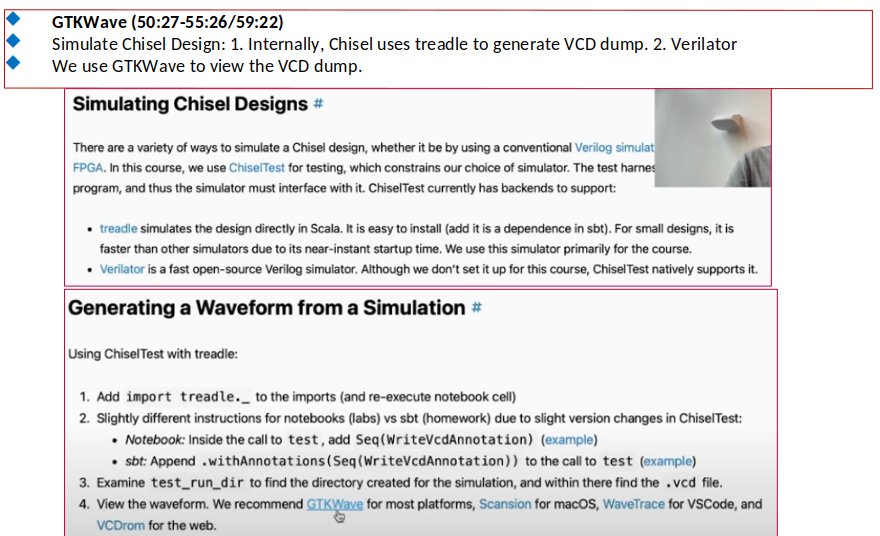

In [41]:
test(new MyCounter(3)) { c =>
// test(new MyCounter(3), Seq(WriteVcdAnnotation)) { c =>
    c.io.en.poke(1.B)
    c.clock.step(5)
}

Elaborating design...
Done elaborating.
incrementing to  0
incrementing to  1
incrementing to  2
wrapping to      0
incrementing to  0
test MyCounter Success: 0 tests passed in 7 cycles in 0.005147 seconds 1359.93 Hz


### Run Testbench to Generate VCD for GTKWave (Waveform Viewer) ###
1. Add Seq (WriteVcdAnnotation) as below:
2. Run Testbench
3. Generate VCD

In [44]:
//test(new MyCounter(3)) { c =>
test(new MyCounter(3), Seq(WriteVcdAnnotation)) { c =>
    c.io.en.poke(1.B)
    c.clock.step(5)
}

Elaborating design...
Done elaborating.
incrementing to  0
incrementing to  1
incrementing to  2
wrapping to      0
incrementing to  0
test MyCounter Success: 0 tests passed in 7 cycles in 0.045977 seconds 152.25 Hz


### Use GTKWave (Waveform Viewer) to View VCD ###


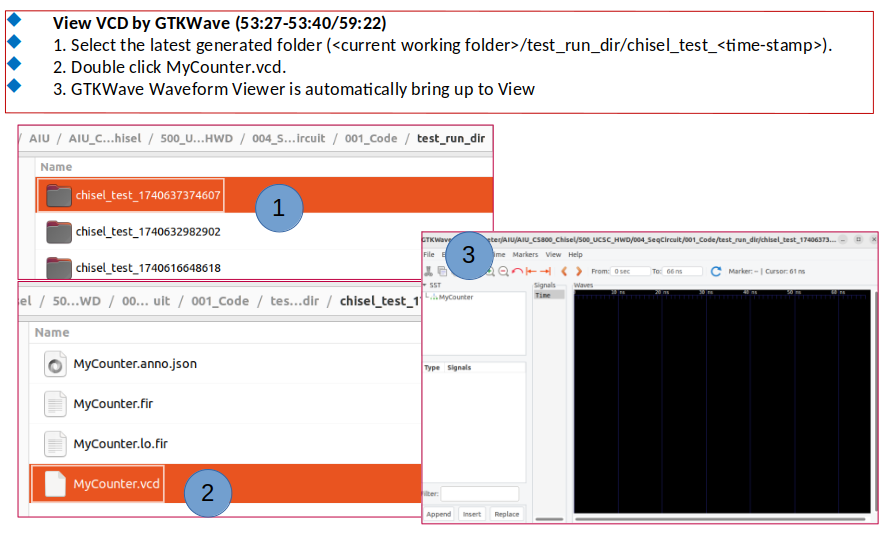

## Additional Ways to Express Literals

* Can add `.U`, `.S`, `.B` to cast to `UInt`, `SInt`, `Bool`
* Can specify bitwidth with more explicit types
* Can prefix a string with encoding `h` (hex), `o` (octal), `b` (binary)
* Can break up long literals with `_`

In [42]:
"b1010".U
"ha".U
"h_dead_beef".U
"ha".U
"ha".U(8.W)
"ha".asUInt(8.W)

res41_0: UInt = UInt<4>(10)
res41_1: UInt = UInt<4>(10)
res41_2: UInt = UInt<32>(3735928559)
res41_3: UInt = UInt<4>(10)
res41_4: UInt = UInt<8>(10)
res41_5: UInt = UInt<8>(10)